In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
import cv2

# Creating Training Dataset

In [4]:
image_size = 64  # HEIGHT AND WIDTH
input_image = [] 
path1=r"C:\Users\SUMEET\Documents\Python\Capstone 2\Deep Fake Dataset\Train"
cate=['Real','Fake']   

for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)
    j=0
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        input_image.append([image_array , label])
        if (j==30000 and label==0):
            break;
        elif (j==50000 and label==1):
            break;
        else:
            j+=1

np.random.shuffle(input_image)   # shuffle -----random sampling

In [5]:
train_x=[]
train_y=[]

for X_values, Y_values in input_image:
    train_x.append(X_values)
    train_y.append(Y_values)

In [6]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [7]:
train_x= train_x/255  # max normilization
train_y= to_categorical(train_y)

# Creating Validation Dataset

In [8]:
input_image1 = [] 
path1=r"C:\Users\SUMEET\Documents\Python\Capstone 2\Deep Fake Dataset\Validation"
cate=['Real','Fake']  

for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)
    j=0
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        input_image1.append([image_array , label])
        if j==5000:
            break;
        else:
            j+=1

np.random.shuffle(input_image1)   # shuffle -----random sampling

In [9]:
val_x=[]
val_y=[]

for X_values, Y_values in input_image1:
    val_x.append(X_values)
    val_y.append(Y_values)

In [10]:
val_x = np.array(val_x)
val_y = np.array(val_y)

In [11]:
val_x= val_x/255  # max normilization
val_y= to_categorical(val_y)

# Creating Test Dataset

In [8]:
image_size = 64  # HEIGHT AND WIDTH
input_image2 = [] 
path1=r"C:\Users\SUMEET\Documents\Python\Capstone 2\Deep Fake Dataset\Test"
cate=['Real','Fake']   

for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        input_image2.append([image_array , label])

np.random.shuffle(input_image2)   # shuffle -----random sampling

In [9]:
test_x=[]
test_y=[]

for X_values, Y_values in input_image2:
    test_x.append(X_values)
    test_y.append(Y_values)

In [10]:
test_x = np.array(test_x)
test_y = np.array(test_y)

In [11]:
test_x= test_x/255  # max normilization

In [16]:
train_x.shape, val_x.shape, test_x.shape

((80002, 64, 64, 3), (10002, 64, 64, 3), (10905, 64, 64, 3))

# Model Building

In [17]:
model = Sequential()
################### CNN - 1 ###################
## Convolution Layer
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
################### CNN - 2 ###################
model.add(Conv2D(filters=64 ,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
################### CNN - 3 ###################
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

#################### Flattening Layer ################### 
model.add(Flatten())
#################### Full connection  ( Neural Netwokr) ###################
model.add(Dense(512, activation='relu'))## 1 HIDDEN LAYER WITH 512 NEURONS
model.add(Dropout(.2))
model.add(Dense(512, activation='relu'))## 2 HIDDEN LAYER WITH 512 NEURONS
model.add(Dropout(.2))
model.add(Dense(2,activation='softmax'))## OUTPUT LAYER WITH 2 NEURONS

In [18]:
model.build(input_shape=(512,64,64,3)) # (Batch_Size, Image_Size,Image_Size, Channels )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (512, 64, 64, 64)         1792      
                                                                 
 max_pooling2d (MaxPooling2  (512, 32, 32, 64)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (512, 30, 30, 64)         36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (512, 15, 15, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (512, 15, 15, 64)         36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (512, 7, 7, 64)           0

In [19]:
adam=tf.keras.optimizers.Adam(learning_rate=.001)  # .001 is default value of lr
model.compile(optimizer = adam , loss = 'binary_crossentropy' , metrics  = ['accuracy']) # Compiling the CNN

In [20]:
history=model.fit(train_x, train_y, epochs=30,batch_size=512, validation_data=(val_x, val_y))

Epoch 1/30
157/157 [==============================] - 217s 1s/step - loss: 0.4720 - accuracy: 0.7595 - val_loss: 0.4417 - val_accuracy: 0.7954
Epoch 2/30
157/157 [==============================] - 211s 1s/step - loss: 0.2746 - accuracy: 0.8798 - val_loss: 0.3302 - val_accuracy: 0.8605
Epoch 3/30
157/157 [==============================] - 206s 1s/step - loss: 0.1956 - accuracy: 0.9183 - val_loss: 0.2686 - val_accuracy: 0.8837
Epoch 4/30
157/157 [==============================] - 205s 1s/step - loss: 0.1613 - accuracy: 0.9333 - val_loss: 0.2339 - val_accuracy: 0.9014
Epoch 5/30
157/157 [==============================] - 206s 1s/step - loss: 0.1406 - accuracy: 0.9429 - val_loss: 0.2216 - val_accuracy: 0.9042
Epoch 6/30
157/157 [==============================] - 205s 1s/step - loss: 0.1218 - accuracy: 0.9506 - val_loss: 0.2277 - val_accuracy: 0.9081
Epoch 7/30
157/157 [==============================] - 204s 1s/step - loss: 0.1021 - accuracy: 0.9586 - val_loss: 0.2373 - val_accuracy: 0.9074

In [21]:
pred_prob= model.predict(test_x)

341/341 [==============================] - 11s 31ms/step


In [22]:
pred= pred_prob.argmax(axis=1)

In [23]:
from sklearn.metrics import confusion_matrix,  classification_report

In [24]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[4813,  600],
       [ 635, 4857]], dtype=int64)

In [25]:
tab_acc.diagonal().sum()*100/tab_acc.sum() # Calculating the Accuracy of the model

88.67491976157726

In [27]:
print("Classification Report: \n",classification_report(test_y, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      5413
           1       0.89      0.88      0.89      5492

    accuracy                           0.89     10905
   macro avg       0.89      0.89      0.89     10905
weighted avg       0.89      0.89      0.89     10905



In [28]:
model.save("DeepFakeMajor_88.6%.h5")

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Loss, Accuracy, Val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [30]:
type(history.history['loss'])

list

In [31]:
len(history.history['loss'])

30

In [32]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.4719986021518707,
 0.2746173143386841,
 0.19557583332061768,
 0.1612505167722702,
 0.14056918025016785]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

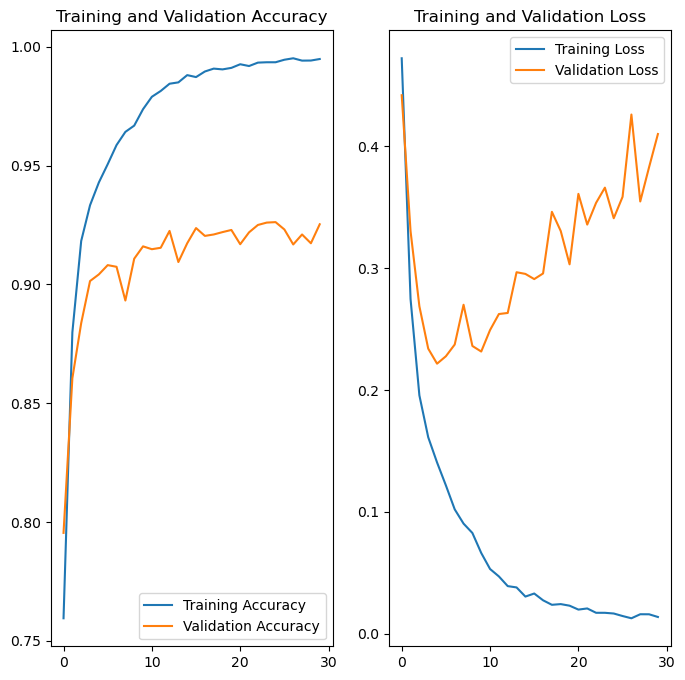

In [35]:
EPOCHS=30
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Loading Model 1

In [36]:
from keras.models import load_model
model = load_model("DeepFakeMajor_88%.h5")

In [37]:
pred_prob= model.predict(test_x)

341/341 [==============================] - 16s 47ms/step


In [38]:
pred= pred_prob.argmax(axis=1)

In [39]:
from sklearn.metrics import confusion_matrix,  classification_report

In [40]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[4508,  905],
       [ 404, 5088]], dtype=int64)

In [41]:
tab_acc.diagonal().sum()*100/tab_acc.sum() # Calculating the Accuracy of the model

87.99633195781752

In [42]:
print("Classification Report: \n",classification_report(test_y, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      5413
           1       0.85      0.93      0.89      5492

    accuracy                           0.88     10905
   macro avg       0.88      0.88      0.88     10905
weighted avg       0.88      0.88      0.88     10905



## Loading Model 2

In [43]:
from keras.models import load_model
model = load_model("DeepFakeMajor_88.4%.h5")

In [44]:
pred_prob= model.predict(test_x)

341/341 [==============================] - 10s 30ms/step


In [45]:
pred= pred_prob.argmax(axis=1)

In [46]:
from sklearn.metrics import confusion_matrix,  classification_report

In [47]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[4908,  505],
       [ 757, 4735]], dtype=int64)

In [48]:
tab_acc.diagonal().sum()*100/tab_acc.sum() # Calculating the Accuracy of the model

88.42732691425951

In [49]:
print("Classification Report: \n",classification_report(test_y, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      5413
           1       0.90      0.86      0.88      5492

    accuracy                           0.88     10905
   macro avg       0.88      0.88      0.88     10905
weighted avg       0.89      0.88      0.88     10905



## Loading Model 3

In [50]:
from keras.models import load_model
model = load_model("DeepFakeMajor_85%.h5")

In [51]:
pred_prob= model.predict(test_x)

341/341 [==============================] - 14s 41ms/step


In [52]:
pred= pred_prob.argmax(axis=1)

In [53]:
from sklearn.metrics import confusion_matrix,  classification_report

In [54]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[4280, 1133],
       [ 458, 5034]], dtype=int64)

In [55]:
tab_acc.diagonal().sum()*100/tab_acc.sum() # Calculating the Accuracy of the model

85.41036221916552

In [56]:
print("Classification Report: \n",classification_report(test_y, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      5413
           1       0.82      0.92      0.86      5492

    accuracy                           0.85     10905
   macro avg       0.86      0.85      0.85     10905
weighted avg       0.86      0.85      0.85     10905



## Loading Model 4

In [12]:
from keras.models import load_model
model = load_model("DeepFakeMajor_88.1%.h5")

In [13]:
pred_prob= model.predict(test_x)

341/341 [==============================] - 16s 46ms/step


In [14]:
pred= pred_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import confusion_matrix,  classification_report

In [16]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[4917,  496],
       [ 795, 4697]], dtype=int64)

In [17]:
tab_acc.diagonal().sum()*100/tab_acc.sum() # Calculating the Accuracy of the model

88.16139385602935

In [18]:
print("Classification Report: \n",classification_report(test_y, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      5413
           1       0.90      0.86      0.88      5492

    accuracy                           0.88     10905
   macro avg       0.88      0.88      0.88     10905
weighted avg       0.88      0.88      0.88     10905

